In [18]:
from typing import Optional

import numpy as np
import torch.nn as nn
import torch

import pytorch_lightning as pl
from torch.utils.data import random_split, DataLoader

# Note - you must have torchvision installed for this example
from torchvision.datasets import MNIST
from torchvision import transforms

In [15]:
from DML_network import DMLEstimateX, DMLEstimateY, DMLEstimateXY
from colored_mnist_data import ColoredMNISTDataModule, SimpleDataset

In [11]:
dm = ColoredMNISTDataModule(data_dir='../datasets/')
dm.setup()
train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()

# def get_dataloader(dl):
#     X = dl.dataset.X.view(dl.dataset.X.shape[0], -1)
#     model_x = DMLEstimateX.load_from_checkpoint('./lightning_logs/X/lightning_logs/version_21/checkpoints/epoch=9-step=489.ckpt')
#     model_x.eval()
#     X_res = X - model_x(dl.dataset.X)

#     y = dl.dataset.y.view(dl.dataset.y.shape[0], -1)
#     model_y = DMLEstimateY.load_from_checkpoint('./ligihtning_logs/Y/lightning_logs/version_8/checkpoints/epoch=4-step=244.ckpt')
#     model_y.eval()
#     y_pred = model_y(X)
#     y_res = y - y_pred
#     print(y.shape, y_pred.shape, y_res.shape)
    
#     data = SimpleDataset(X_res, y_res)
#     return DataLoader(data, batch_size=dm.batch_size)

In [20]:
def _mean_accuracy(logits, y):
    preds = (logits > 0.).float()
    return ((preds - y).abs() < 1e-2).float().mean()

In [24]:
# model = DMLEstimateXY.load_from_checkpoint('./linearXY/lightning_logs/version_3/checkpoints/epoch=9-step=489.ckpt')
model = DMLEstimateXY.load_from_checkpoint('./DML/lightning_logs/version_9/checkpoints/epoch=0-step=195.ckpt')
model.eval()
logits = model(val_dl.dataset.X).view(-1, 1)
print(nn.functional.binary_cross_entropy_with_logits(logits, val_dl.dataset.y))
print(_mean_accuracy(logits, val_dl.dataset.y))

tensor(0.3595, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.9053)


In [33]:
val_dl.dataset.y

tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]])

In [43]:
sum(preds == val_dl.dataset.y)

tensor([9053])

In [38]:
preds = (logits > 0.).float()

In [10]:
torch.save(t.dataset, './dataset.pt')

In [4]:
t = get_dataloader(train_dl)

torch.Size([50000, 1]) torch.Size([50000, 392]) torch.Size([50000, 392])


In [9]:
t.dataset.y.shape

torch.Size([50000, 392])

In [5]:
s = torch.Tensor([1])

In [6]:
ss = torch.ones((1, 300))

In [7]:
s - ss

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [27]:
X = train_dl.dataset.X.view(train_dl.dataset.X.shape[0], -1)
model_x = DMLEstimateX.load_from_checkpoint('./lightning_logs/X/lightning_logs/version_21/checkpoints/epoch=9-step=489.ckpt')
model_x.eval()
X_res = X - model_x(train_dl.dataset.X)

In [36]:
y = train_dl.dataset.y.view(train_dl.dataset.y.shape[0], -1)
model_y = DMLEstimateY.load_from_checkpoint('./ligihtning_logs/Y/lightning_logs/version_8/checkpoints/epoch=4-step=244.ckpt')
model_y.eval()
y_res = y - model_y(X)

In [38]:
y_res

tensor([[ 1.6960,  1.3029,  1.5601,  ...,  1.5591,  1.4307,  1.7451],
        [ 0.8210,  0.8250,  0.8592,  ...,  0.8874,  0.8514,  0.8106],
        [-1.3096, -1.4440, -1.4176,  ..., -1.3397, -1.2270, -1.3382],
        ...,
        [ 1.7357,  1.6978,  1.6142,  ...,  1.6858,  1.5561,  1.5902],
        [ 1.4852,  1.3415,  1.3237,  ...,  1.4934,  1.1943,  1.3517],
        [ 1.5133,  1.3601,  1.4072,  ...,  1.2507,  1.2966,  1.4637]],
       grad_fn=<SubBackward0>)

In [3]:
model_x = DMLEstimateX.load_from_checkpoint('./lightning_logs/X/lightning_logs/version_21/checkpoints/epoch=9-step=489.ckpt')

In [4]:
from colored_mnist_data import ColoredMNISTDataModule

In [5]:
dm = ColoredMNISTDataModule(data_dir='../datasets/')
dm.setup()

/h/300/vahid/.conda/envs/torch-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
train_dl = dm.train_dataloader()

In [16]:
new_X = train_dl.dataset.X.view(50000, -1)

In [25]:
(255 * new_X[0]).int()

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 182,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 254,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 137,   0, 229,   0,   0,   0,   0,   0,
          0,   0, 254,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 137,   0, 168,   0,   0,   0,   0,   0,
          0,   0, 254,   0,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 163,   0, 229,   0,   0,  

In [26]:
(output[0] * 255).int()

tensor([ 10,  13,  11,   9,  13,  10,  13,  10,  11,  11,  13,  13,  14,  11,
         11,  11,  12,  11,  10,  14,  11,  11,  10,  13,  13,  13,  12,  13,
         13,   9,  10,  10,   9,  11,  11,  10,  12,  12,  11,  12,  12,  12,
         12,  11,  10,  10,  11,  11,   9,  12,  11,  11,   9,  10,  11,  11,
         13,  10,  11,  11,  13,  10,  13,  11,  10,  12,  23,  13,  26,  12,
         29,  13,  32,  10,  46,  12,  15,  12,  14,  10,  10,  12,  10,  12,
         10,  11,  12,  10,  10,   9,  19,  10,  75,  13,  82,  11,  56,  11,
         58,  10,  86,  10,  79,   9,  34,  11,  23,  11,  11,  11,   9,  10,
         11,  11,  13,  11,  14,  12,  58,  13,  98,  11, 106,  14,  69,  10,
        100,  11, 142,  12, 154,  10,  55,  11,  28,  10,  12,  12,   9,  11,
         10,  14,  10,  11,  16,   9, 101,  12, 159,  12,  52,  11,  26,  10,
         52,  12, 119,  10, 166,  10,  69,  13,  33,  11,  16,  11,  12,   9,
         11,  12,  13,  11,  14,  10, 116,  10, 134,   9,  62,  

In [11]:
output = model_x(train_dl.dataset.X)

In [25]:
model_x.eval()
output = model_x(train_dl.dataset.X)

DMLEstimateX(
  (sur_layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (1): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (2): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (3): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (4): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (5): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (6): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (7): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=True)
      (1): Sigmoid()
    )
    (8): Sequential(
      (0): Linear(in_features=391, out_features=1, bias=T

In [2]:
from colored_mnist_data import ColoredMNISTDataModule

In [3]:
dm = ColoredMNISTDataModule('../datasets/')

In [4]:
dm.setup()

/h/300/vahid/.conda/envs/torch-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [24]:
val_dl = dm.val_dataloader()

In [15]:
torch.cat([train_dl.dataset.X[0], torch.zeros((28, 28, 1))], dim=2)

torch.Size([28, 28, 3])

In [10]:
mnist_full = MNIST('../datasets/', train=True, transform=None)

In [2]:
x = torch.randn(2, 3)

In [5]:
torch.cat([x, x], dim=0).shape

torch.Size([4, 3])

In [24]:
envs[0]['labels'].shape

torch.Size([25000, 1])

In [2]:
train, envs = colored_mnist_data('../datasets/')

/h/300/vahid/.conda/envs/torch-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [59]:
val_dl = dm.val_dataloader()
train_dl = dm.train_dataloader()

tensor([0.])


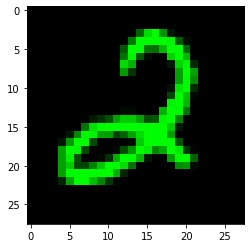

In [103]:
from matplotlib import pyplot as plt
i = np.random.randint(5000)
plt.imshow(torch.cat([val_dl.dataset.X[i], torch.zeros((28, 28, 1))], dim=2))
print(val_dl.dataset.y[i])
# plt.imshow(torch.cat([train_dl.dataset.X[i], torch.zeros((28, 28, 1))], dim=2))

In [5]:
val_dl = dm.val_dataloader()
train_dl = dm.train_dataloader()

In [6]:
dl = train_dl

In [9]:
s = sum(dl.dataset.X[:, :, :, 1].view(25000, -1).sum(1) == 0)

In [10]:
sum(dl.dataset.y[np.where(dl.dataset.X[:, :, :, 1].view(25000, -1).sum(1) == 0)[0]]) / s

tensor([0.2017])

In [11]:
from classifier import train

In [19]:
! python classifier.py --hidden_dim=83 --lr=.003 --data_dir="../datasets/" --num_workers=32

Global seed set to 1239754
Global seed set to 1239754
GPU available: True, used: False
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
/h/300/vahid/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1294: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(
/h/300/vahid/.conda/envs/torch-env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally a